# <center>Principal Component Analysis</center>

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3
np.set_printoptions(precision=3)
import pylab as pl

## Import Dataset

In [7]:
X = pd.read_csv('Iris Dataset.csv')
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
X.shape

(150, 6)

### To find the eigen values we first have to find the variance & covariance of the data

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X.iloc[:,1:5])
print(X_std[0:5])
print("The shape of Feature Matrix is -",X_std.shape)

[[-0.901  1.032 -1.341 -1.313]
 [-1.143 -0.125 -1.341 -1.313]
 [-1.385  0.338 -1.398 -1.313]
 [-1.507  0.106 -1.284 -1.313]
 [-1.022  1.263 -1.341 -1.313]]
The shape of Feature Matrix is - (150, 4)


In [13]:
X_covariance_matrix = np.cov(X_std.T)

In [14]:
X_covariance_matrix

array([[ 1.007, -0.11 ,  0.878,  0.823],
       [-0.11 ,  1.007, -0.423, -0.359],
       [ 0.878, -0.423,  1.007,  0.969],
       [ 0.823, -0.359,  0.969,  1.007]])

In [15]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.522 -0.372 -0.721  0.262]
 [-0.263 -0.926  0.242 -0.124]
 [ 0.581 -0.021  0.141 -0.801]
 [ 0.566 -0.065  0.634  0.524]]

Eigenvalues 
[2.93  0.927 0.148 0.021]


In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893165
0.9274036215173417
0.14834222648163994
0.020746013995596356


In [19]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.77045209380132, 23.03052326768064, 3.68383195762739, 0.5151926808906425]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.77   95.801  99.485 100.   ]


In [26]:
print("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.9303537755893165, array([ 0.522, -0.263,  0.581,  0.566])), (0.9274036215173417, array([-0.372, -0.926, -0.021, -0.065])), (0.14834222648163994, array([-0.721,  0.242,  0.141,  0.634])), (0.020746013995596356, array([ 0.262, -0.124, -0.801,  0.524]))]
----------------------------------------
Matrix W:
 [[ 0.522 -0.372]
 [-0.263 -0.926]
 [ 0.581 -0.021]
 [ 0.566 -0.065]]


<b>All Eigen Values along with Eigen Vectors for each column:<br></b>
<b>Eigen Value: </b>2.9303537755893165, <b>Eigen Vector: </b>array([ 0.522, -0.263,  0.581,  0.566]),<br>
<b>Eigen Value: </b>0.9274036215173417, <b>Eigen Vector: </b>array([-0.372, -0.926, -0.021, -0.065]),<br>
<b>Eigen Value: </b>0.14834222648163994, <b>Eigen Vector: </b>array([-0.721,  0.242,  0.141,  0.634]),<br>
<b>Eigen Value: </b>0.020746013995596356 <b>Eigen Vector: </b>array([ 0.262, -0.124, -0.801,  0.524])


In [34]:
Y = X_std.dot(matrix_w)
print(Y[0:5])

[[-2.265 -0.506]
 [-2.086  0.655]
 [-2.368  0.318]
 [-2.304  0.575]
 [-2.389 -0.675]]


In [31]:
from sklearn.datasets import load_iris
iris = load_iris()

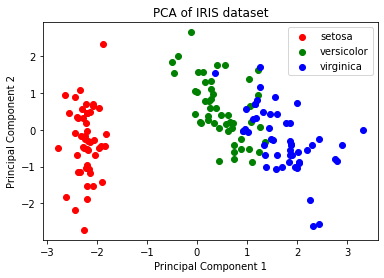

In [32]:
plt.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()